<a href="https://colab.research.google.com/github/MarielaNina/NeuralNetworksClass/blob/main/Projeto3_Mariela_Nina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COM 520 - Aprendizado profundo

#Exercicio de APoio -Semna4
#autoenconder com o MNIST

- carregamento dos pacotes necessarios
- Carregamento dos dados MNIST
- Modelo Raso
- Modelo Profundo


#Autoencoders
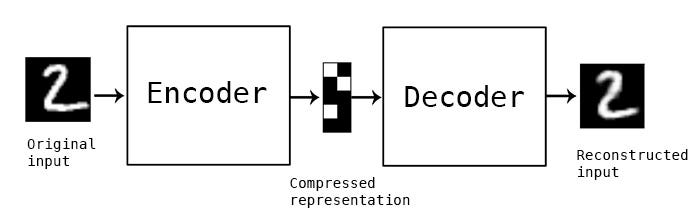

estructura padrao de um autoencoder:
- camada de codificacion(Encoder)
- camada de decodificacion(Decoder)



#Pacotes

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import keras.datasets as kds

import numpy as np
import matplotlib.pyplot as plt

#bibliotecas utilizadas para projecion/reduccion de diemnsionalidades

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA, PCA


#Carregamento dos dados MNIST

*MNIST-Fashion*

Fonte: wiki/MNIST_database

no keras: keras.io/api/datasets/mnist/

In [ ]:
num_classes=10
input_shape=(28,28,1)

#carga dos dados (keras.datasets)

(x_train,y_train),(x_test,y_test)=kds.mnist.load_data()

#normalizacion das features (convertir de 0 a 1)
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

x_train=x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 784)
(10000, 784)


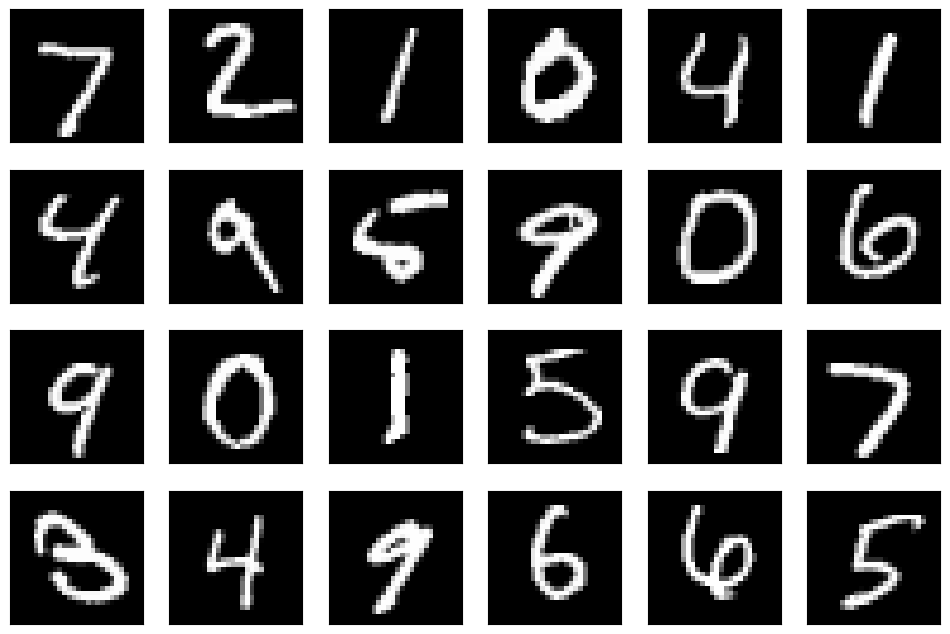

In [ ]:
plt.figure(figsize=(12,8))
for i in range(24):
  ax=plt.subplot(4,6,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

#Autoencoder01: Autoencoder Raso

#Definicion do modelo

In [ ]:
encoding_dim=12
input_img=keras.Input(shape=(784,))
encoded=layers.Dense(encoding_dim, activation='relu')(input_img)
decoded=layers.Dense(784, activation='sigmoid')(encoded)

autoencoder01=keras.Model(input_img, decoded)
autoencoder01.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │         9,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        10,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,612 (76.61 KB)

 Trainable params: 19,612 (76.61 KB)

 Non-trainable params: 0 (0.00 B)

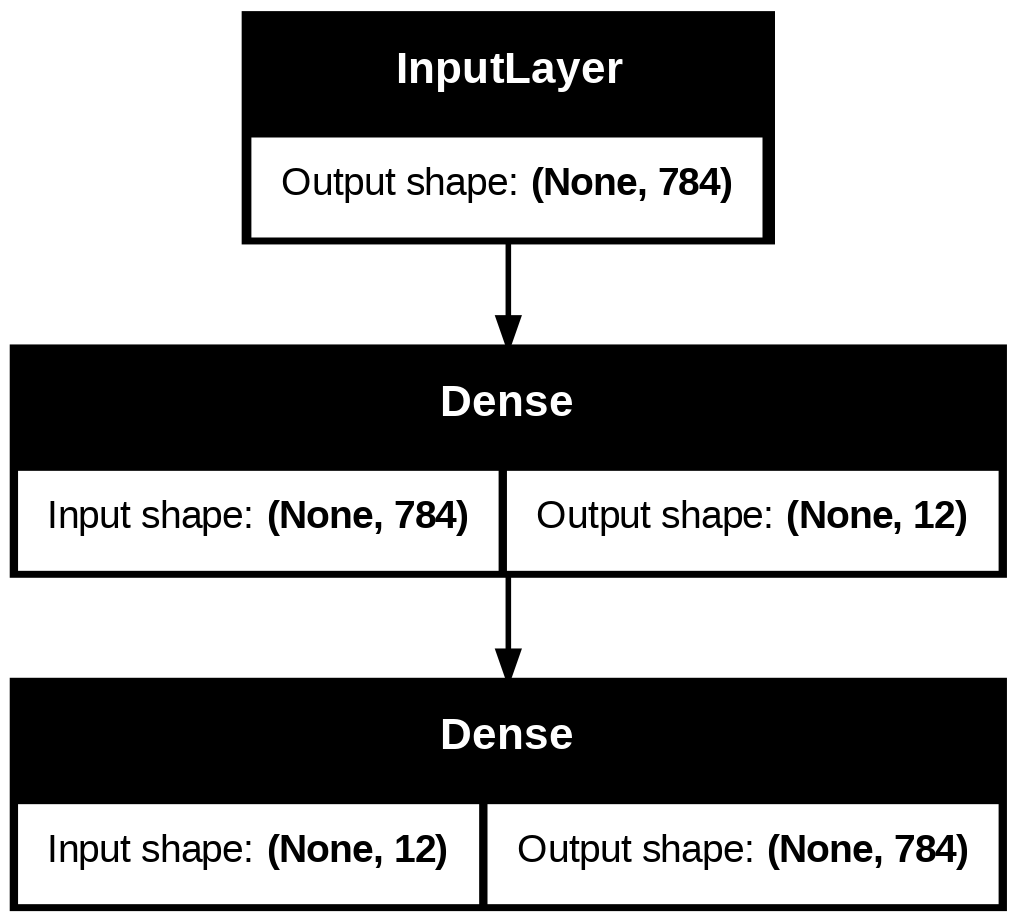

In [ ]:
tf.keras.utils.plot_model(autoencoder01, show_shapes=True)

#Creacion dos modelos Encder e Decoder

In [ ]:
encoder01=keras.Model(input_img, encoded)

encoded_input=keras.Input(shape=(encoding_dim,))
decoder_layer=autoencoder01.layers[-1]
decoder01=keras.Model(encoded_input, decoder_layer(encoded_input))

#Treinamento do AUtoencoder 01

In [ ]:
autoencoder01.compile(optimizer='adam', loss='binary_crossentropy')
history= autoencoder01.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose=1)#usar1 ou 2 para observar a evolucion por epoca
#


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.4337 - val_loss: 0.2424
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2256 - val_loss: 0.1896
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1859 - val_loss: 0.1729
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1717 - val_loss: 0.1646
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1641 - val_loss: 0.1593
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1595 - val_loss: 0.1562
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1569 - val_loss: 0.1541
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1548 - val_loss: 0.1526
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1533 - val_loss: 0.1510
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1522 - val_loss: 0.1498
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1512 - val_loss: 0.1488
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

#EVALUACION

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


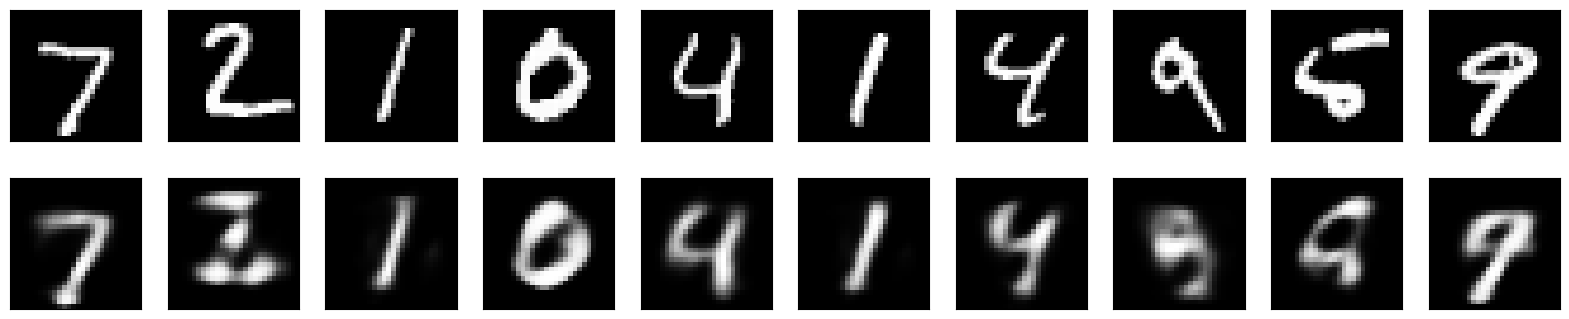

In [ ]:
decoded_imgs01=autoencoder01.predict(x_test)

n=10 #imagens visualizadas
plt.figure(figsize=(20,4))
for i in range(n):
  #original
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Reconstruccion

  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs01[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

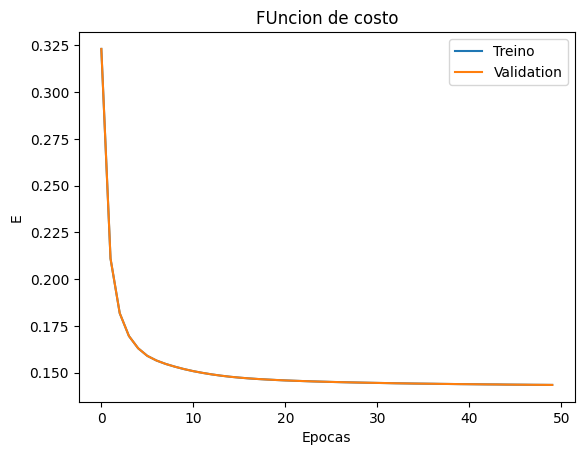

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['loss'], label='Validation')
plt.title("FUncion de costo")
plt.ylabel("E")
plt.xlabel("Epocas")
plt.legend()
plt.show()

#PROJECCION COM PCA

fonte: sklearn.decomposition.PCA.html

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


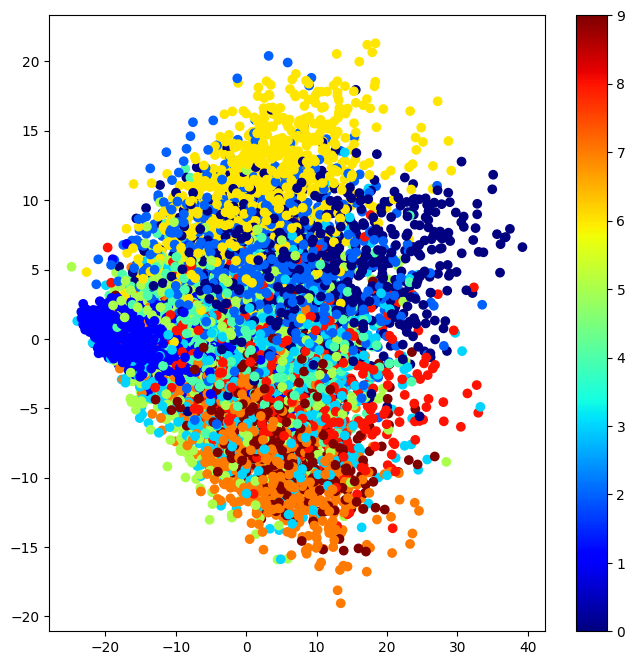

In [ ]:
x_test_encoded=encoder01.predict(x_test, batch_size=256)
x_emb=PCA(n_components=2).fit_transform(x_test_encoded)

plt.figure(figsize=(8,8))
plt.scatter(x_emb[:,0], x_emb[:,1], c=y_test, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

#projeccion com t-SNE (una uno linear)

fuente: sklearn.manifold.TSNE.html

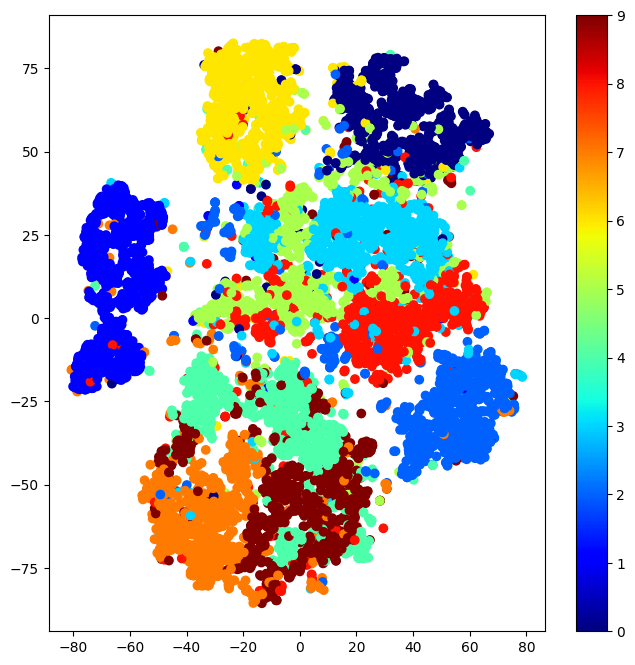

In [ ]:
x_emb=TSNE(n_components=2).fit_transform(x_test_encoded)

plt.figure(figsize=(8,8))
plt.scatter(x_emb[:,0], x_emb[:,1], c=y_test, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

#AUTOENCODER02: Autoencoder Profundo

#Definicion do Modelo

In [ ]:
encoding_dim=12

input_img=keras.Input(shape=(784,))
encoded=layers.Dense(128, activation='relu')(input_img)
encoded=layers.Dense(64, activation='relu')(encoded)
encoded=layers.Dense(encoding_dim, activation='relu')(encoded)
decoded=layers.Dense(64, activation='relu')(encoded)
decoded=layers.Dense(128, activation='relu')(decoded)
decoded=layers.Dense(784, activation='sigmoid')(decoded)

autoencoder02=keras.Model(input_img, decoded)
autoencoder02.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,804 (858.61 KB)

 Trainable params: 219,804 (858.61 KB)

 Non-trainable params: 0 (0.00 B)

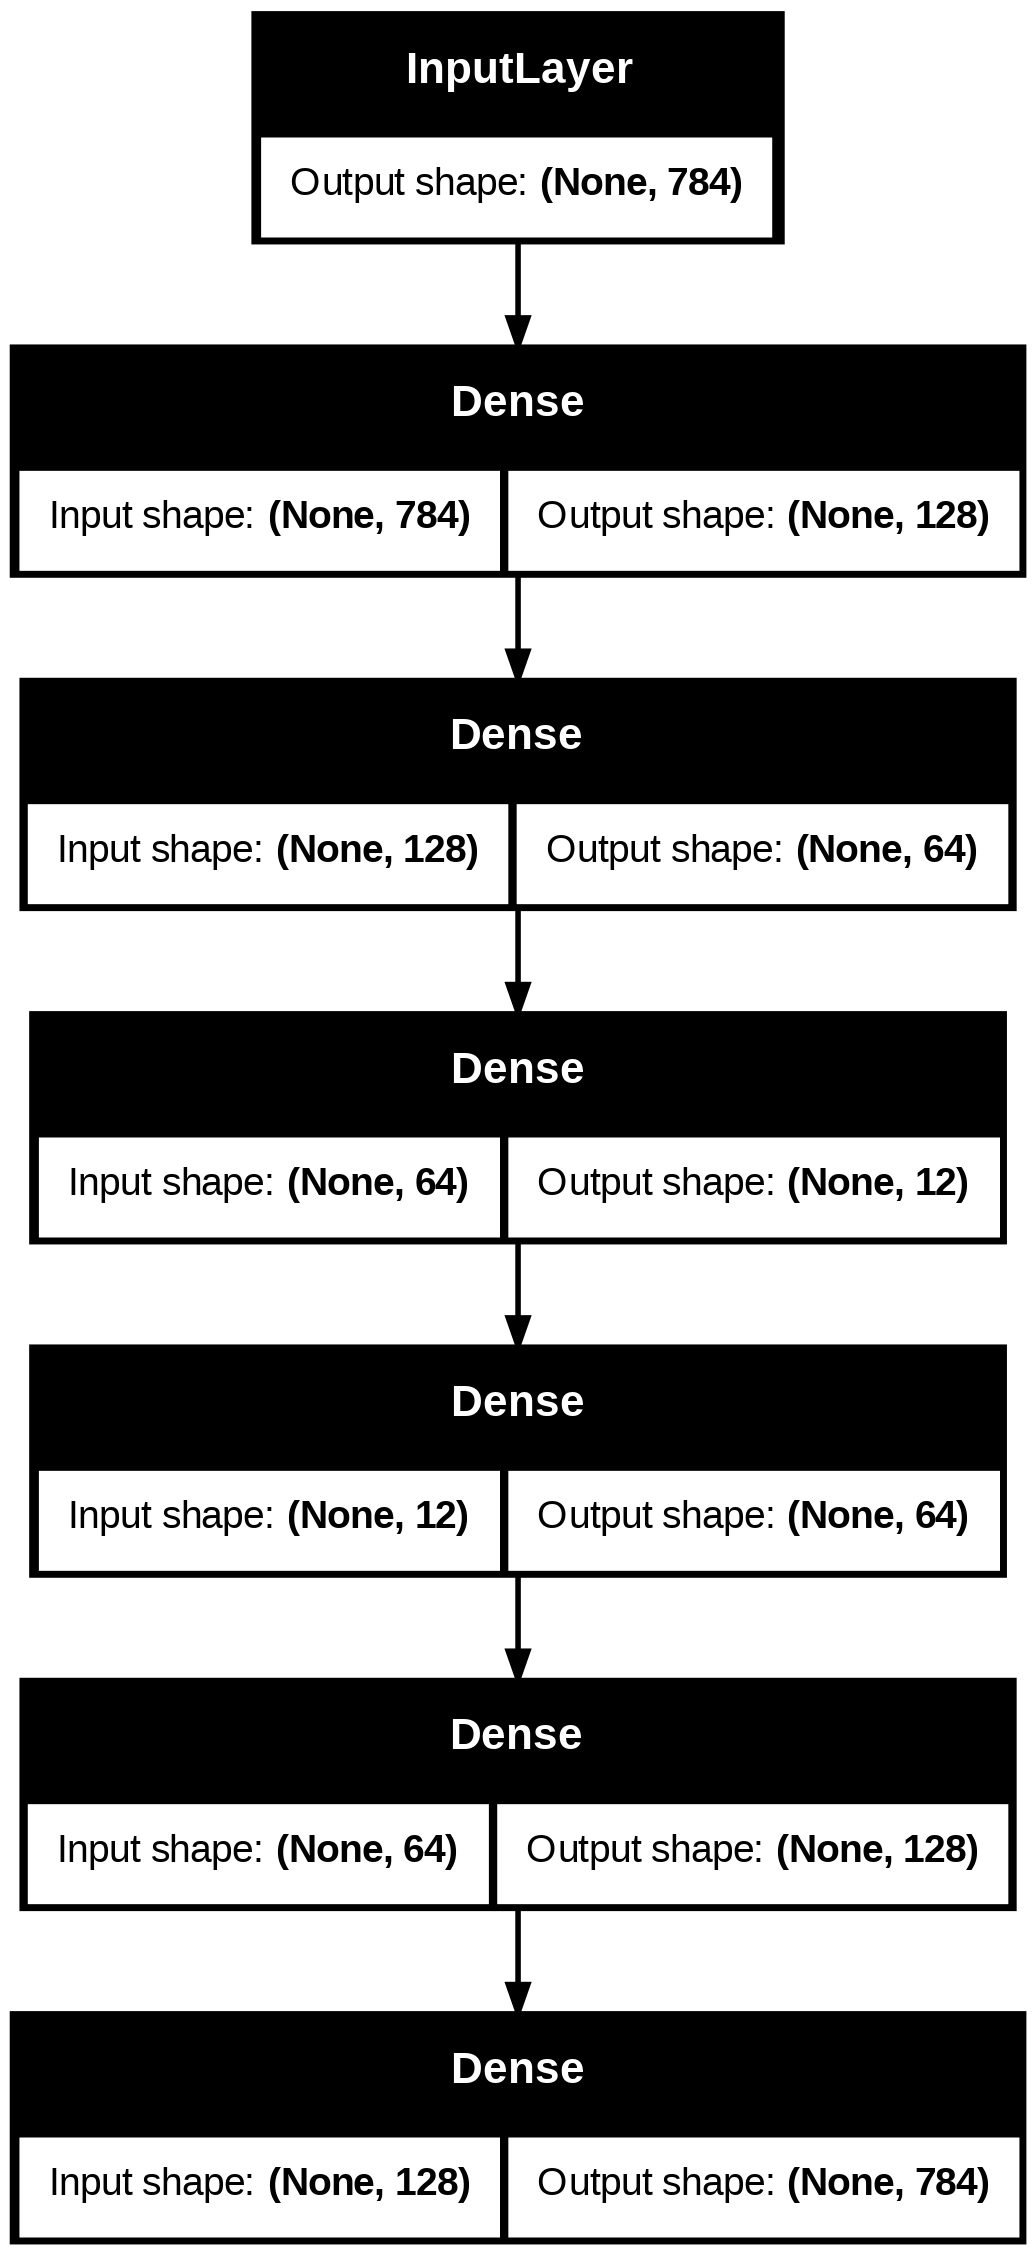

In [ ]:
tf.keras.utils.plot_model(autoencoder02, show_shapes=True)

# Creacion dos modelos Encoder e Decoder

In [ ]:
encoder02=keras.Model(input_img, encoded)

encoded_input=keras.Input(shape=(encoding_dim,))
decoder_layer=autoencoder02.layers[-3] #numero de camadas da salida ate a codificacion latente
decoder02=keras.Model(encoded_input, decoder_layer(encoded_input))

# Treinamento do autoencoder

In [ ]:
autoencoder02.compile(optimizer='adam', loss='binary_crossentropy')
history= autoencoder02.fit(x_train, x_train,
                          epochs=100,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose=1)#usar1 ou 2 para observar a evolucion por epoca
#

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.3501 - val_loss: 0.1790
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1695 - val_loss: 0.1494
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1471 - val_loss: 0.1381
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1376 - val_loss: 0.1327
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1333 - val_loss: 0.1297
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1305 - val_loss: 0.1275
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1286 - val_loss: 0.1258
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1267 - val_loss: 0.1243
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1250 - val_loss: 0.1230
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1237 - val_loss: 0.1221
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1229 - val_loss: 0.1209
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━

#EVALUACION

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


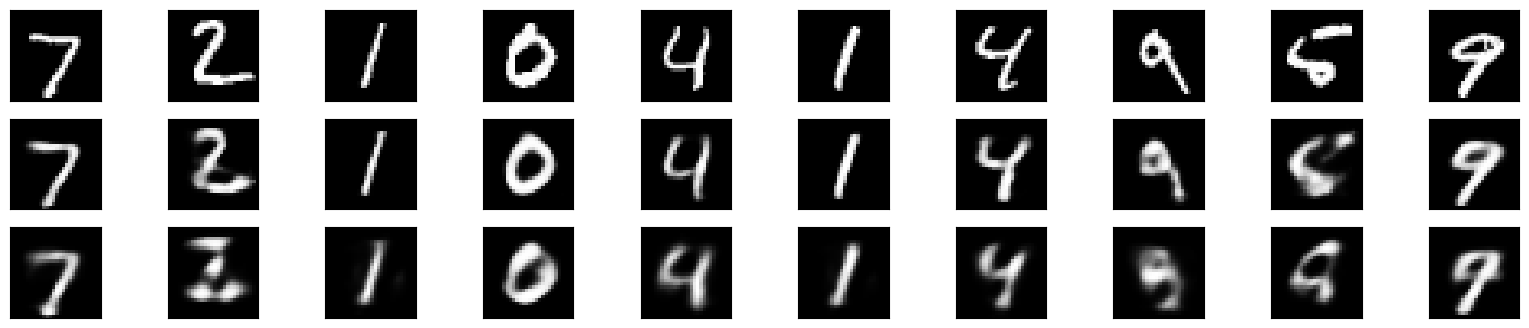

In [ ]:
decoded_imgs02=autoencoder02.predict(x_test)

n=10 #imagens visualizadas
plt.figure(figsize=(20,4))
for i in range(n):
  #original
  ax=plt.subplot(3,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Reconstruccion

  ax=plt.subplot(3,n,i+1+n)
  plt.imshow(decoded_imgs02[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #reconstruccion (raso)
  ax=plt.subplot(3,n,i+1+2*n)
  plt.imshow(decoded_imgs01[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

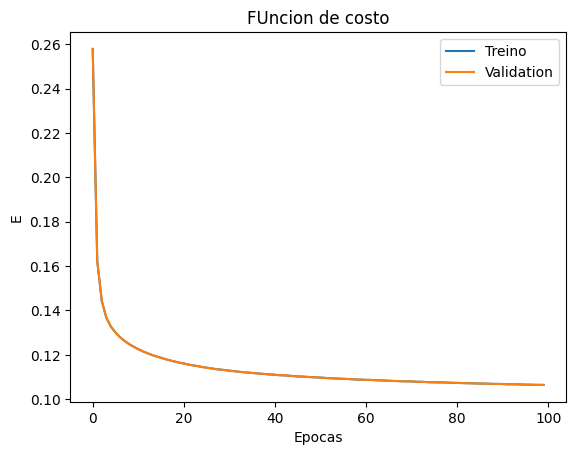

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['loss'], label='Validation')
plt.title("FUncion de costo")
plt.ylabel("E")
plt.xlabel("Epocas")
plt.legend()
plt.show()

# PROJECCION COM PCA

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


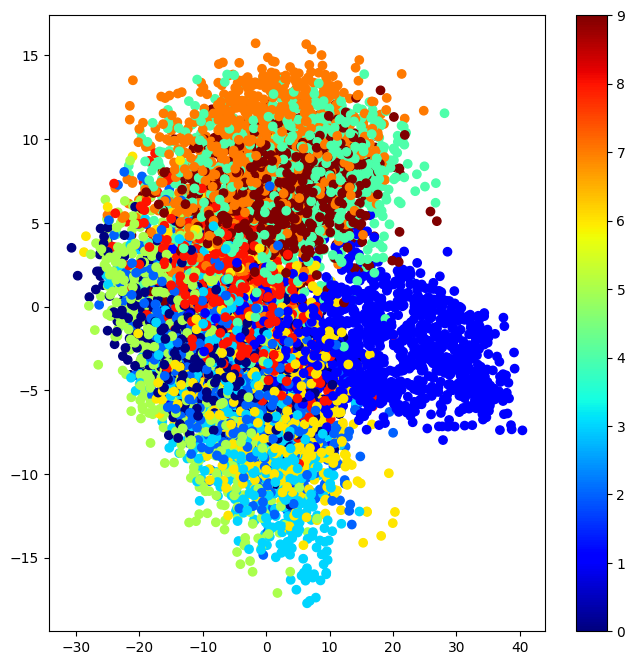

In [ ]:
x_test_encoded=encoder02.predict(x_test, batch_size=256)
x_emb=PCA(n_components=2).fit_transform(x_test_encoded)

plt.figure(figsize=(8,8))
plt.scatter(x_emb[:,0], x_emb[:,1], c=y_test, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

# projeccion com t-SNE (una uno linear)

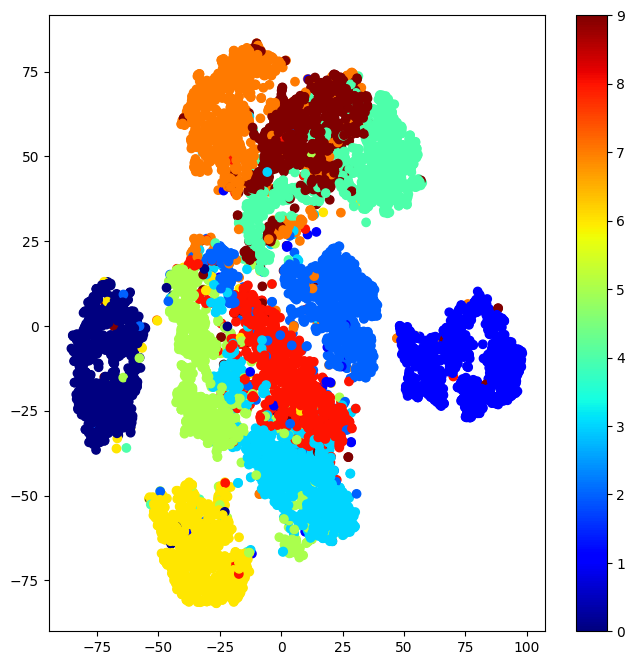

In [ ]:
x_emb=TSNE(n_components=2).fit_transform(x_test_encoded)

plt.figure(figsize=(8,8))
plt.scatter(x_emb[:,0], x_emb[:,1], c=y_test, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

#Observacion sobre espacio latente

- a dimension do espacio latente nao necessariamente precisa ser menor que a dimension original
- dofemos usar autoencoders esparsos para ampliar a domencionalidade de representacion do problema
- os autoencoders esparsos demandam algun tipo de regularizacion para evitar o aprendizado da solucion trivial